In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import numpy as np
import plotly.express as px

In [8]:
# Loading the cleaned Datasets
US_data = pd.read_csv('US-cleaned_data.csv')
US_data.head()


,Report ID,Report Version,Make,Model,Model Year,ADS Equipped?,Automation System Engaged?,Incident Date,Incident Time (24:00),City,...,Roadway Type,Roadway Surface,Posted Speed Limit (MPH),Lighting,Crash With,Highest Injury Severity Alleged,SV Pre-Crash Movement,Weather,SV Contact Area,Country
0,10003-2800,4,International,LT,2022-01-01,No,"Unknown, see Narrative",2025-11-21,19:57:00,Maxatawny Tounship,...,Street,Dry,25.0,Dark - Not Lighted,Other Fixed Object,Unknown,Proceeding Straight,Missing,Front,US
1,10003-2932,1,International,LT,2022-01-01,Yes,"Unknown, see Narrative",2021-11-04,19:57:00,Maxatawny Township,...,Street,Dry,25.0,Dark - Not Lighted,Other Fixed Object,Unknown,Proceeding Straight,Missing,Front,US
2,10003-3210,1,International,LT625,2021-01-01,Yes,"Unknown, see Narrative",2022-04-04,15:52:00,Tucson,...,Highway / Freeway,Dry,65.0,Daylight,Other Fixed Object,No Injuries Reported,Proceeding Straight,Clear,Front,US
3,10003-4179,1,International,LT,2022-01-01,No,ADAS,2025-10-22,15:09:00,Missing,...,Highway / Freeway,Dry,65.0,Daylight,Passenger Car,Unknown,Proceeding Straight,Clear,Front,US
4,10003-6050,2,International,LT625,2022-01-01,No,"Unknown, see Narrative",2025-12-22,08:20:00,Natural Bridge,...,Highway / Freeway,Dry,70.0,Daylight,Other Fixed Object,No Injuries Reported,Proceeding Straight,Clear,"Back, Front, Nearside, Offside",US


In [9]:
# Loading the cleaned Datasets
UK_data = pd.read_csv('UK-cleaned_data.csv')
UK_data.head()


,Report ID,Report Version,Highest Injury Severity Alleged,Incident Date,Incident Time (24:00),Roadway Type,Posted Speed Limit (MPH),Lighting,Weather,Roadway Surface,...,Crash With,SV Contact Area,City,State,Country,Make,Model,Model Year,ADS Equipped?,Automation System Engaged?
0,2019010155206,10155206,Minor,2019-01-01,01:15:00,Single carriageway,30.0,Dark - Lighted,Clear,Single carriageway,...,NaN,Front,Chadwell Heath,Greater London,United Kingdom,SUZUKI,SWIFT,2015.0,Conventional,Conventional
1,2019010155217,10155217,Serious,2019-01-01,04:10:00,Dual carriageway,40.0,Dark - Lighted,Clear,Dual carriageway,...,Other Fixed Object,Front,Ilford,Greater London,United Kingdom,HYUNDAI,I30,2015.0,Conventional,Conventional
2,2019010155425,10155425,Minor,2019-01-02,15:07:00,Single carriageway,20.0,Daylight,Clear,Single carriageway,...,NaN,Front,Stamford Hill,Greater London,United Kingdom,MERCEDES,C CLASS,2018.0,Conventional,Conventional
3,2019010156538,10156538,Minor,2019-01-08,21:20:00,Single carriageway,20.0,Dark - Lighted,Clear,Single carriageway,...,NaN,Front,Goodmayes,Greater London,United Kingdom,TOYOTA,AVENSIS,2005.0,Conventional,Conventional
4,2019010156721,10156721,Serious,2019-01-10,08:20:00,Dual carriageway,30.0,Daylight,Clear,Dual carriageway,...,NaN,Front,South Norwood,Greater London,United Kingdom,AUDI,A4,2017.0,Conventional,Conventional


In [10]:
# Printing all columns for both datasets
print("Columns in UK_data:")
print(UK_data.columns)

print("\nColumns in US_data:")
print(US_data.columns)

# Checking if both datasets have the same number of rows and columns
print("\nShape of UK_data:", UK_data.shape)
print("Shape of US_data:", US_data.shape)


Columns in UK_data:
Index(['Report ID', 'Report Version', 'Highest Injury Severity Alleged',
       'Incident Date', 'Incident Time (24:00)', 'Roadway Type',
       'Posted Speed Limit (MPH)', 'Lighting', 'Weather', 'Roadway Surface',
       'SV Pre-Crash Movement', 'Crash With', 'SV Contact Area', 'City',
       'State', 'Country', 'Make', 'Model', 'Model Year', 'ADS Equipped?',
       'Automation System Engaged?'],
      dtype='object')

Columns in US_data:
Index(['Report ID', 'Report Version', 'Make', 'Model', 'Model Year',
       'ADS Equipped?', 'Automation System Engaged?', 'Incident Date',
       'Incident Time (24:00)', 'City', 'State', 'Roadway Type',
       'Roadway Surface', 'Posted Speed Limit (MPH)', 'Lighting', 'Crash With',
       'Highest Injury Severity Alleged', 'SV Pre-Crash Movement', 'Weather',
       'SV Contact Area', 'Country'],
      dtype='object')

Shape of UK_data: (232365, 21)
Shape of US_data: (4372, 21)


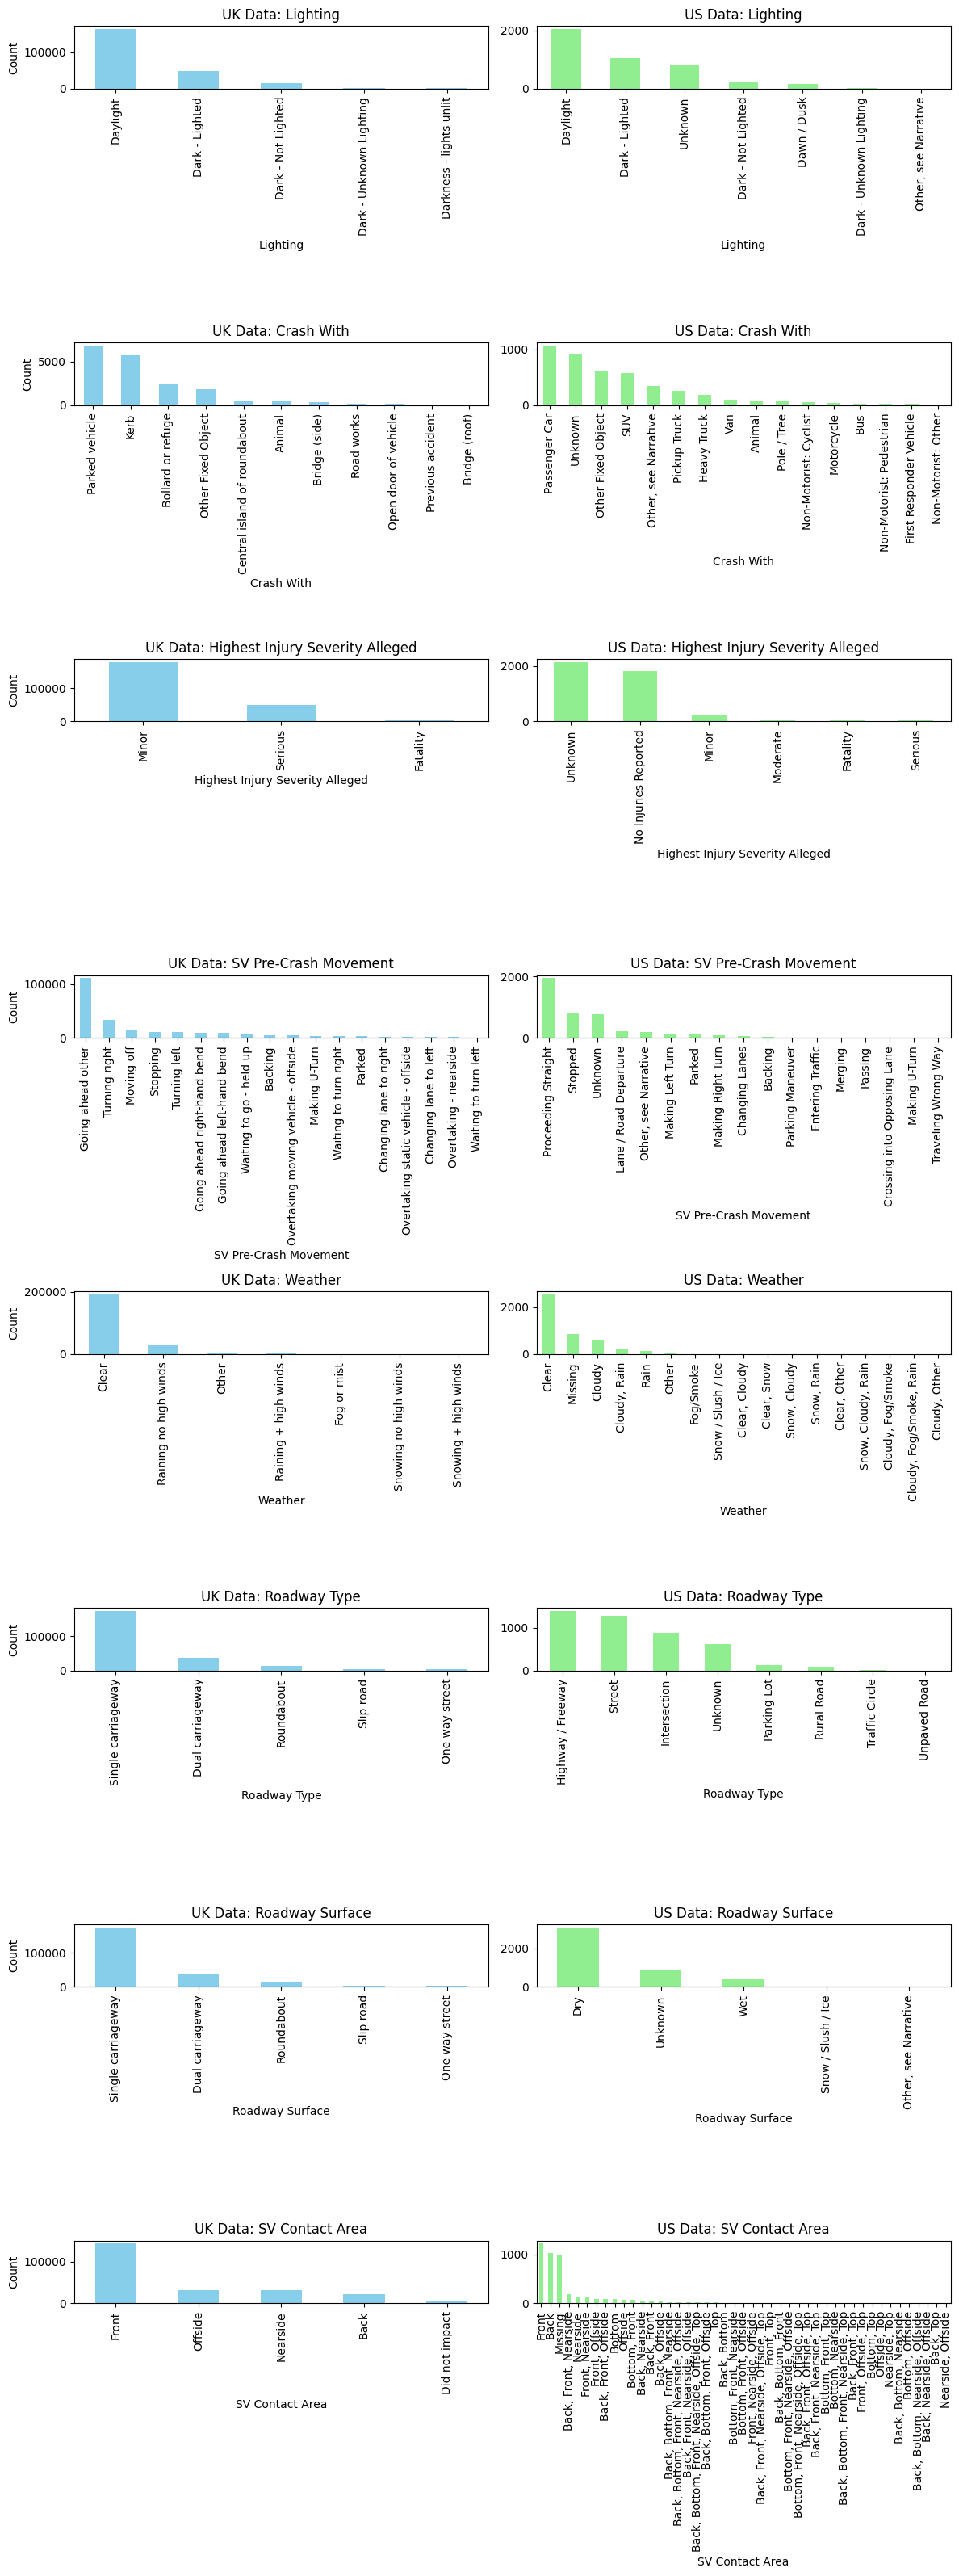

In [11]:
# Columns to plot
columns_to_plot = [
    'Lighting', 'Crash With', 'Highest Injury Severity Alleged', 
    'SV Pre-Crash Movement', 'Weather', 'Roadway Type', 
    'Roadway Surface', 'SV Contact Area'
]

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(12, len(columns_to_plot) * 4), sharey=False)

for idx, column in enumerate(columns_to_plot):
    # UK_data bar chart
    UK_data[column].value_counts().plot(kind='bar', ax=axes[idx, 0], color='skyblue')
    axes[idx, 0].set_title(f'UK Data: {column}')
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel('Count')

    # US_data bar chart
    US_data[column].value_counts().plot(kind='bar', ax=axes[idx, 1], color='lightgreen')
    axes[idx, 1].set_title(f'US Data: {column}')
    axes[idx, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

In [12]:
# Plotting bar chart for US SV Contact Area data
# Print unique values in the "SV Contact Area" column for US_data
print("Unique values in US_data['SV Contact Area']:")
print(US_data['SV Contact Area'].unique())

Unique values in US_data['SV Contact Area']:
['Front' 'Back, Front, Nearside, Offside' 'Back, Front' 'Missing'
 'Back, Front, Nearside' 'Back, Front, Offside' 'Bottom' 'Back, Offside'
 'Offside' 'Bottom, Front' 'Front, Nearside' 'Back' 'Front, Top'
 'Back, Bottom, Front, Nearside, Offside'
 'Back, Front, Nearside, Offside, Top'
 'Back, Bottom, Front, Nearside, Offside, Top' 'Back, Nearside, Offside'
 'Bottom, Front, Top' 'Bottom, Front, Nearside' 'Front, Nearside, Offside'
 'Top' 'Front, Offside' 'Bottom, Front, Offside'
 'Back, Front, Nearside, Top' 'Nearside' 'Back, Nearside' 'Back, Top'
 'Bottom, Front, Nearside, Offside, Top' 'Bottom, Nearside'
 'Back, Front, Offside, Top' 'Back, Bottom, Front, Nearside'
 'Back, Bottom, Nearside, Offside' 'Back, Bottom, Front'
 'Back, Bottom, Front, Offside' 'Back, Bottom, Nearside' 'Back, Bottom'
 'Bottom, Front, Nearside, Offside' 'Back, Bottom, Front, Nearside, Top'
 'Bottom, Offside' 'Back, Front, Top' 'Nearside, Top' 'Offside, Top'
 'Bottom, T

In [13]:
from collections import Counter

# Drop missing or null values
area_series = US_data['SV Contact Area'].dropna()

# Split, strip whitespace, and flatten
all_areas = []
for item in area_series:
    parts = [part.strip() for part in item.split(',')]
    all_areas.extend(parts)

# Count occurrences
area_counts = Counter(all_areas)

# Convert to DataFrame for display
area_counts_df = pd.DataFrame(area_counts.items(), columns=['Area', 'Count']).sort_values(by='Count', ascending=False)

print(area_counts_df)


       Area  Count
0     Front   1948
1      Back   1544
4   Missing    979
2  Nearside    598
3   Offside    375
5    Bottom    258
6       Top     58


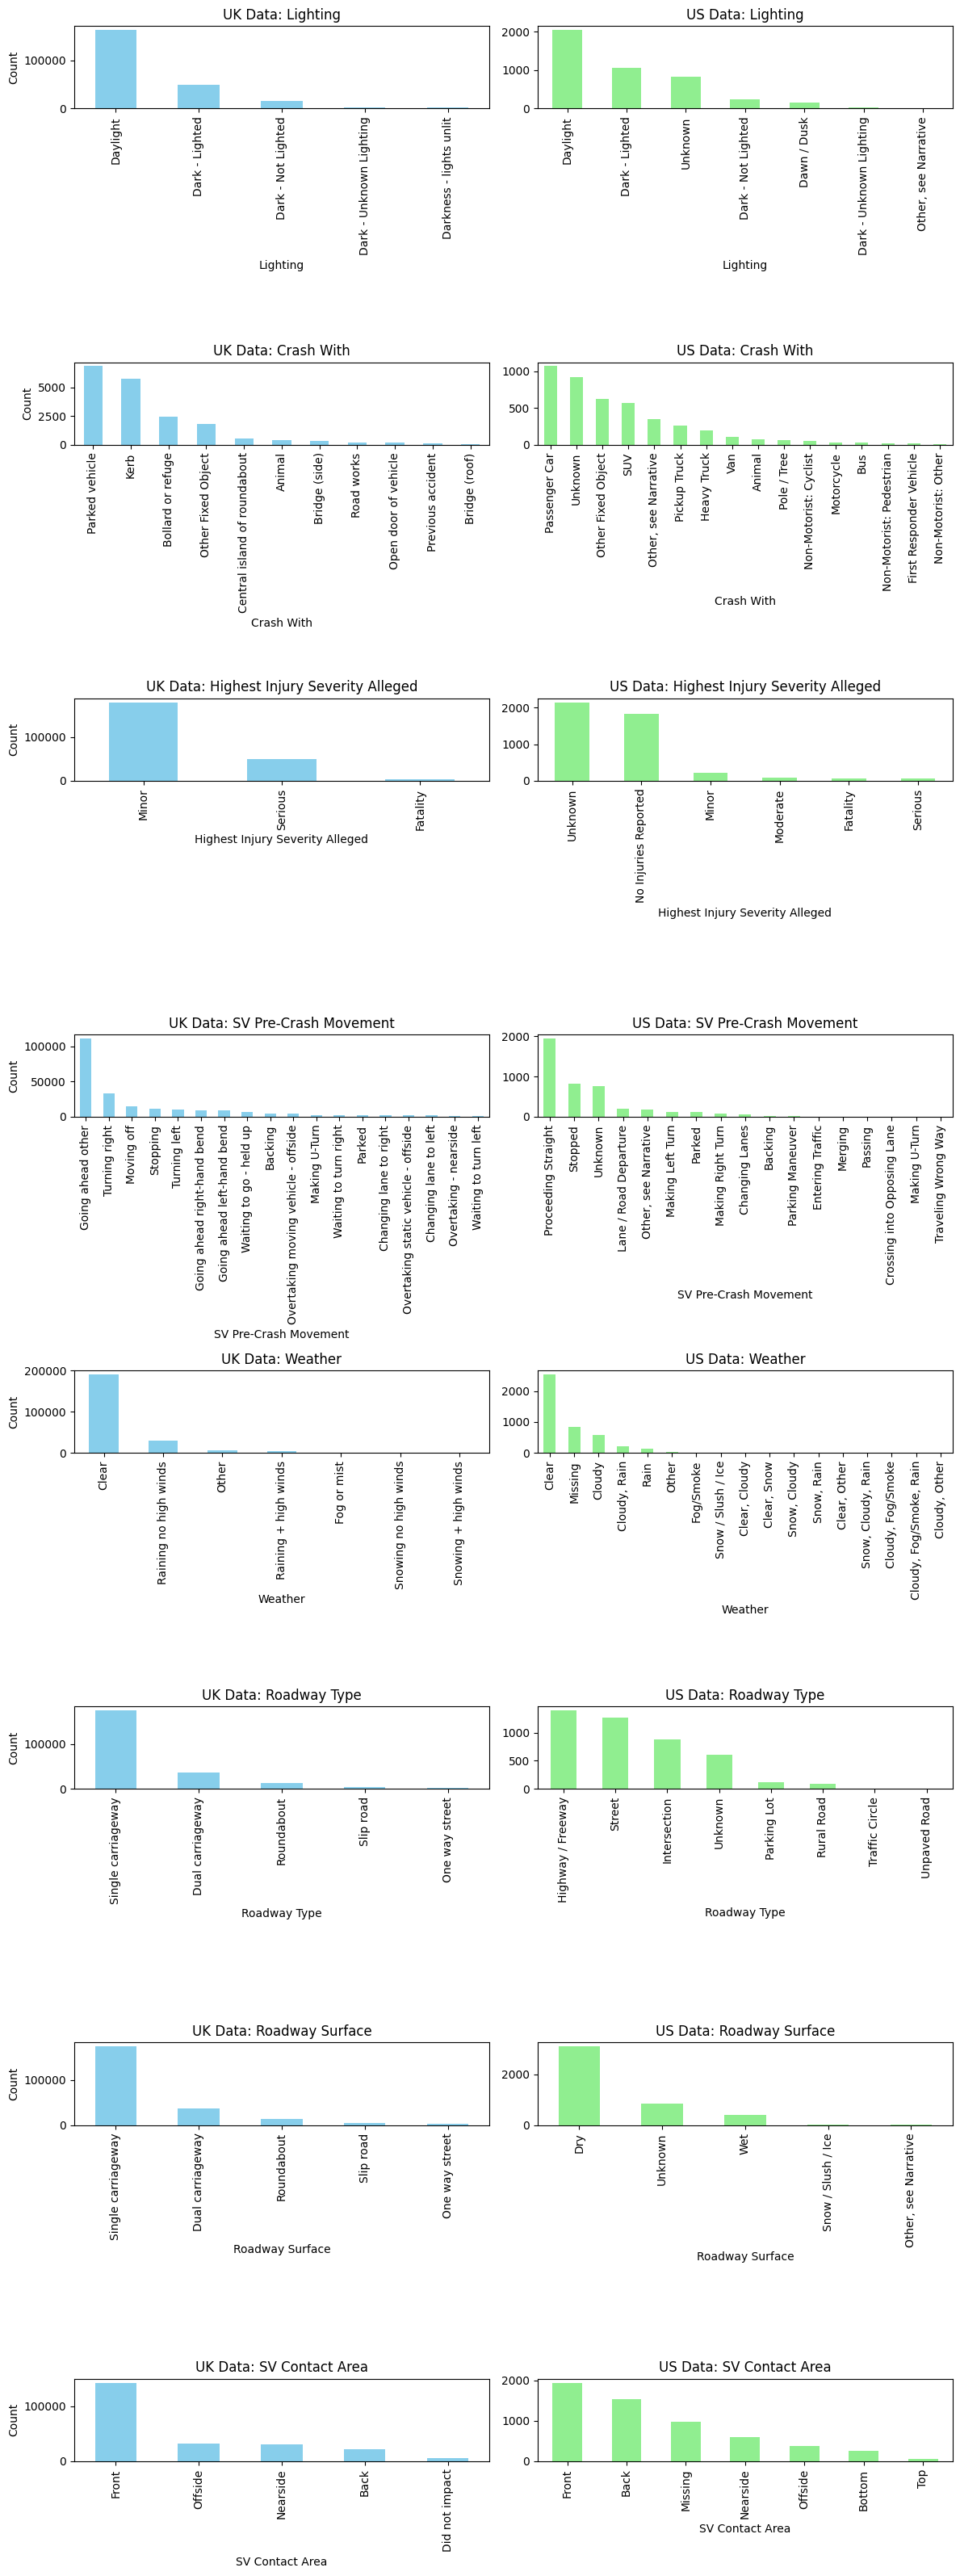

In [14]:
from collections import Counter

# Columns to plot
columns_to_plot = [
    'Lighting', 'Crash With', 'Highest Injury Severity Alleged', 
    'SV Pre-Crash Movement', 'Weather', 'Roadway Type', 
    'Roadway Surface', 'SV Contact Area'
]

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(12, len(columns_to_plot) * 4), sharey=False)

for idx, column in enumerate(columns_to_plot):
    # UK_data bar chart
    UK_data[column].value_counts().plot(kind='bar', ax=axes[idx, 0], color='skyblue')
    axes[idx, 0].set_title(f'UK Data: {column}')
    axes[idx, 0].set_xlabel(column)
    axes[idx, 0].set_ylabel('Count')

    # US_data bar chart
    if column == 'SV Contact Area':
        # Handle combined values for US_data['SV Contact Area']
        area_series = US_data['SV Contact Area'].dropna()
        all_areas = []
        for item in area_series:
            parts = [part.strip() for part in item.split(',')]
            all_areas.extend(parts)
        area_counts = Counter(all_areas)
        area_counts_df = pd.Series(area_counts).sort_values(ascending=False)
        area_counts_df.plot(kind='bar', ax=axes[idx, 1], color='lightgreen')
    else:
        US_data[column].value_counts().plot(kind='bar', ax=axes[idx, 1], color='lightgreen')
    
    axes[idx, 1].set_title(f'US Data: {column}')
    axes[idx, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

